In [1]:
import os
import pickle
import pandas as pd
from tqdm.notebook import tqdm
from functions import readSet, corrMatrix, saveSet
tqdm.pandas()

In [2]:
dataset = 'AirlineTweets'
#dataset = 'Sentiment140'
inputFile = f'./data/{dataset}/Dimensions.csv'
postags = readSet('./wordlists/postags.txt')
dimensions = pickle.load(open('./data/Dimensions-All.pickle', mode='rb'))
dimensions.keys()

dict_keys(['base', 'postag', 'postagwords', 'lexical', 'syntactic', 'semantic', 'sentiment', 'formulas'])

In [3]:
df = pd.read_csv(inputFile)

<AxesSubplot:>

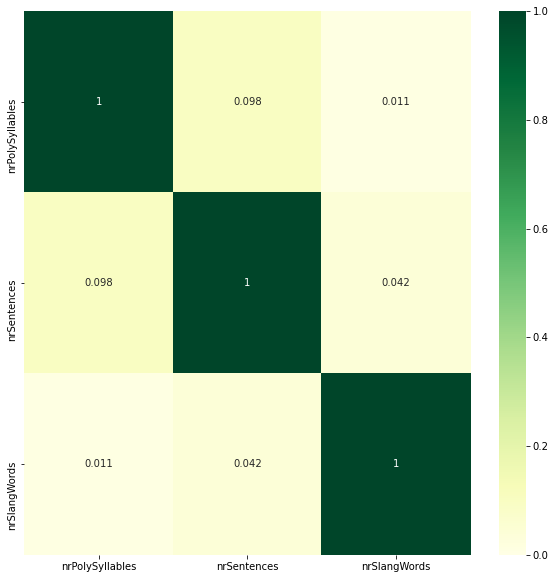

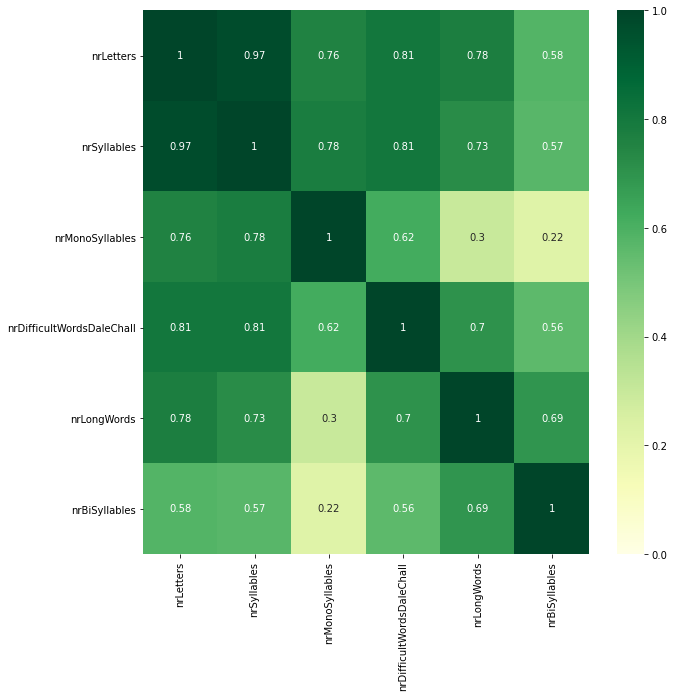

In [4]:
baseGroup = ['nrLetters', 'nrSyllables', 'nrMonoSyllables', 'nrDifficultWordsDaleChall', 'nrLongWords', 'nrBiSyllables']
base = [x for x in dimensions['base'] if x not in postags and x not in baseGroup and x not in ['nrDifficultWordsSAT', 'nrWords', 'nrSynsets']]
corrMatrix(df[base])
corrMatrix(df[baseGroup])

<AxesSubplot:>

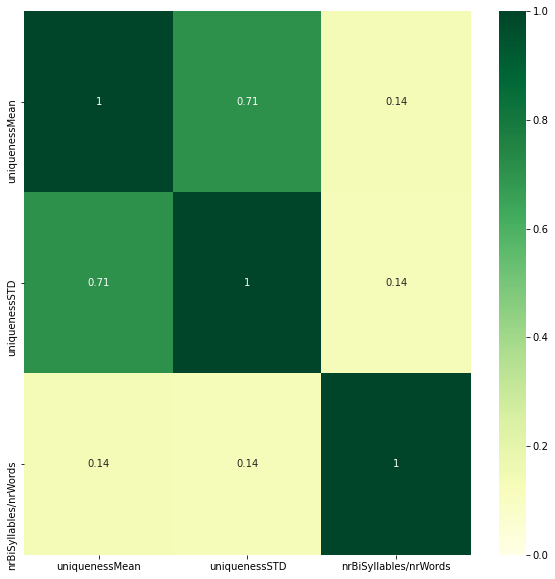

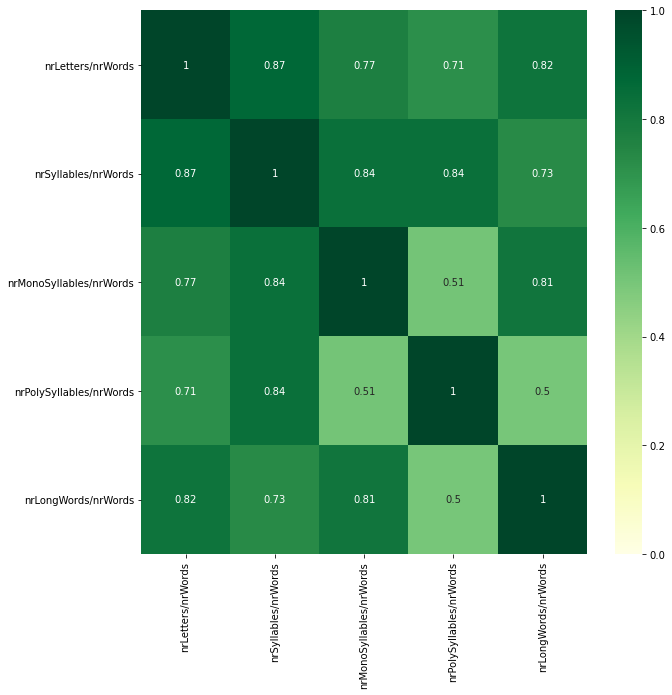

In [5]:
lexicalGroup = ['nrLetters/nrWords', 'nrSyllables/nrWords', 'nrMonoSyllables/nrWords', 'nrPolySyllables/nrWords', 'nrLongWords/nrWords']
lexical = [x for x in dimensions['lexical'] if x not in lexicalGroup]
corrMatrix(df[lexical])
corrMatrix(df[lexicalGroup])

<AxesSubplot:>

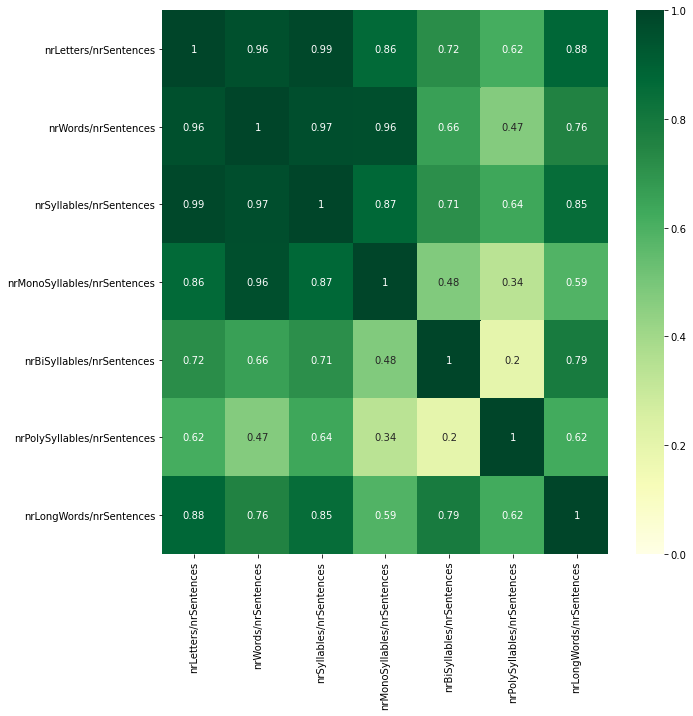

In [6]:
syntacticGroup = dimensions['syntactic']
corrMatrix(df[syntacticGroup])

In [7]:
postagwords = dimensions['postagwords']
semantic = dimensions['semantic']

sentiment = [x for x in dimensions['sentiment'] if x not in ['nrAmbiguousSentimentWords', 'nrStrongSentimentWords']]

<AxesSubplot:>

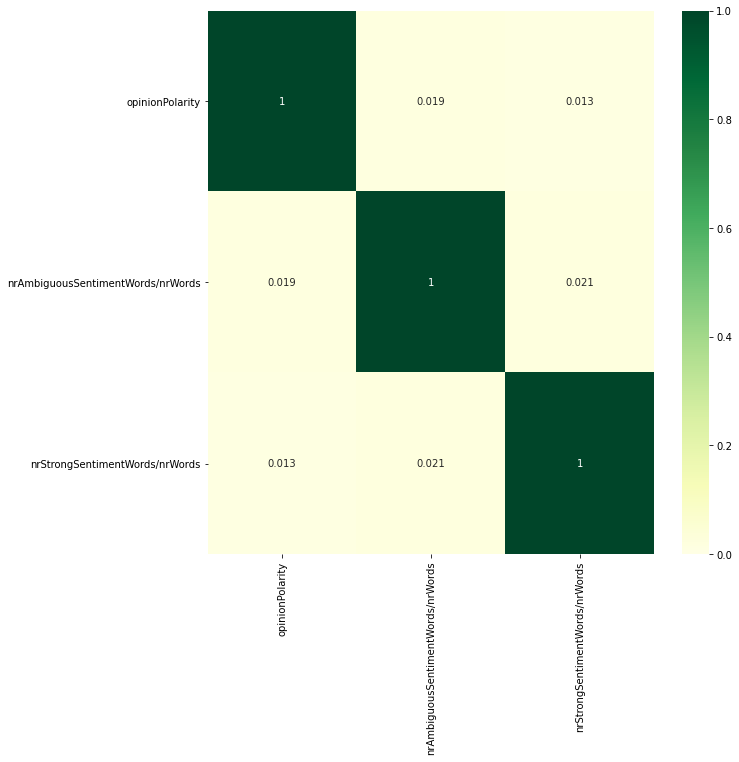

In [8]:
corrMatrix(df[sentiment])

In [9]:
dimensions.keys()

dict_keys(['base', 'postag', 'postagwords', 'lexical', 'syntactic', 'semantic', 'sentiment', 'formulas'])

In [10]:
picked = base + postagwords + lexical + semantic + sentiment
groups = {
    'base': baseGroup,
    'lexical': lexicalGroup,
    'syntactic': syntacticGroup
}
saveSet('./data/Dimensions-Picked-Base.txt', picked)
pickle.dump(groups, open('./data/Dimensions-Correlated-Groups.pickle', 'wb'))

['nrPolySyllables', 'nrSentences', 'nrSlangWords', 'nrConjunctions/nrWords', 'nrAdjectives/nrWords', 'nrAdverbs/nrWords', 'nrComplexVerbs/nrWords', 'nrPossesives/nrWords', 'nrDeterminers/nrWords', 'uniquenessMean', 'uniquenessSTD', 'nrBiSyllables/nrWords', 'nrDifficultWordsSAT/nrWords', 'nrDifficultWordsDaleChall/nrWords', 'nrSynsets/nrWords', 'opinionPolarity', 'nrAmbiguousSentimentWords/nrWords', 'nrStrongSentimentWords/nrWords']


<AxesSubplot:>

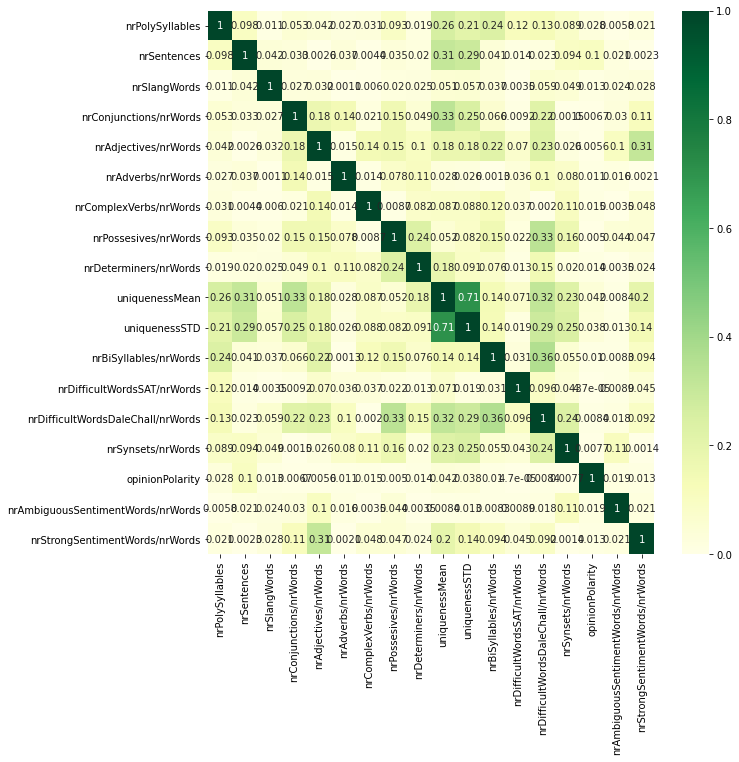

In [11]:
print(picked)
corrMatrix(df[picked])